# Tarea - escalamiento y transformación
En el archivo `Escalamiento.xlsx` se encuentran dos variables, las cuales se pretenden analizar para una posterior predicción.

Se entrenará una red neuronal con la variable $x_1$ usando una función de activación sigmoidal unipolar, y la variable $x_2$ se usará para entrenar una red neuronal con una función de activación de tangente hiperbólica.

Use el escalamiento adecuado para cada variable con la finalidad de que la red neuronal opere en el rango de cada función de activación.

Transforme cada variable usando una función del tipo $\sqrt[a]{x}$, donde $a\in\mathbb{R}$, con el fin de obtener un sesgo cercano a cero y evalue si existen datos atípicos con el criterio de $1.5$ veces el rango intercuartílico por encima y por debajo de $Q_3$ y $Q_1$ para cada variable.

In [51]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson

In [1]:

df=pd.read_excel('files/Escalamiento.xlsx')
df.head()

,x1,x2
0,6050000.0,5390000.0
1,4720000.0,700000.0
2,4460000.0,10140000.0
3,34740000.0,6600000.0
4,1910000.0,3390000.0


# Extraer columnas en Arrays de numpy

In [11]:
x_1 = df["x1"].to_numpy()
x_1.shape, x_1

((3287,),
 array([ 6050000.,  4720000.,  4460000., ..., 11030000., 21330000.,
         4130000.]))

In [10]:
x_2 = df["x2"].to_numpy()
x_2.shape, x_2

((3287,),
 array([ 5390000.,   700000., 10140000., ...,  8400000.,  2010000.,
        15240000.]))

In [18]:
x_1.min(), x_1.max()

(30000.0, 299920000.0)

In [19]:
x_2.min(), x_2.max()

(10401.351928710938, 549070000.0)

# Escalamiento de los datos

In [25]:
# feature_range tuple (min, max)
# Para x_1 será escalada al rango [0, 1], porque la función de activación sigmoidal unipolar tiene ese rango de salida.
# Para x_2 será escalada al rango [-1, 1] porque la función de activación de tangente hiperbólica tiene ese rango de salida.
# Fuente: https://www.codificandobits.com/blog/funcion-de-activacion/#la-funci%C3%B3n-tangente-hiperb%C3%B3lica-tanh
scaler_1 = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler_1.fit_transform(x_1.reshape(-1, 1)).flatten()

scaler_2 = MinMaxScaler(feature_range=(-1, 1))
x_2_scaled = scaler_2.fit_transform(x_2.reshape(-1, 1)).flatten()

In [21]:
x_1_scaled

array([0.02007403, 0.01563907, 0.01477208, ..., 0.03668012, 0.07102604,
       0.01367168])

In [22]:
x_2_scaled

array([-0.98040432, -0.99748807, -0.96310201, ..., -0.96944012,
       -0.99271628, -0.94452479])

# Transformación con $\sqrt[a]{x}$, donde $a\in\mathbb{R}$

In [52]:
x_1_transformed, lambda_x1 = yeojohnson(x_1_scaled)
x_2_transformed, lambda_x2 = yeojohnson(x_2_scaled)

In [55]:
lambda_x1
# transformación sería del tipo x^{lambda_x1}

-8.031589032156656

In [56]:
lambda_x2
# transformación sería del tipo x^{lambda_x2}

-24.73211820983249

# Evaluar datos atipicos

In [62]:
# Cálculo del rango intercuartílico y detección de datos atípicos
q1_x1, q3_x1 = np.percentile(x_1_transformed, [25, 75])
iqr_x1 = q3_x1 - q1_x1
lower_bound_x1 = q1_x1 - 1.5 * iqr_x1
upper_bound_x1 = q3_x1 + 1.5 * iqr_x1
outliers_x1 = np.where((x_1_transformed < lower_bound_x1) | (x_1_transformed > upper_bound_x1))[0]

In [63]:
lower_bound_x1, upper_bound_x1

(-0.07793196307783319, 0.17976344816533107)

In [64]:
# Outliers de x1
outliers_x1

array([], dtype=int64)

In [65]:
q1_x2, q3_x2 = np.percentile(x_2_transformed, [25, 75])
iqr_x2 = q3_x2 - q1_x2
lower_bound_x2 = q1_x2 - 1.5 * iqr_x2
upper_bound_x2 = q3_x2 + 1.5 * iqr_x2
outliers_x2 = np.where((x_2_transformed < lower_bound_x2) | (x_2_transformed > upper_bound_x2))[0]


In [66]:
lower_bound_x2, upper_bound_x2

(-5707241.525764154, 323478.64883367205)

In [67]:
# Outliers x2
outliers_x2

array([], dtype=int64)

Text(0.5, 1.0, 'Histograma de x_1')

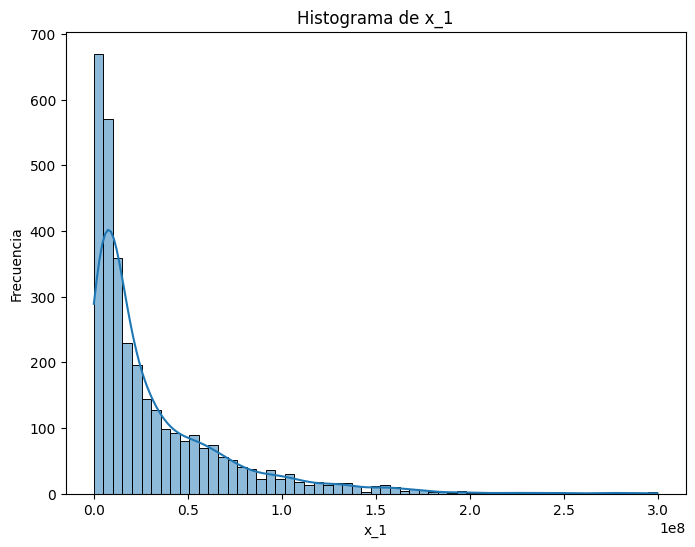

In [43]:
# Histograma de la variable x_1
plt.figure(figsize=(8,6))
sns.histplot(x_1, kde=True)
plt.xlabel('x_1')
plt.ylabel('Frecuencia')
plt.title('Histograma de x_1')

Text(0.5, 1.0, 'Histograma de x_1 transformada')

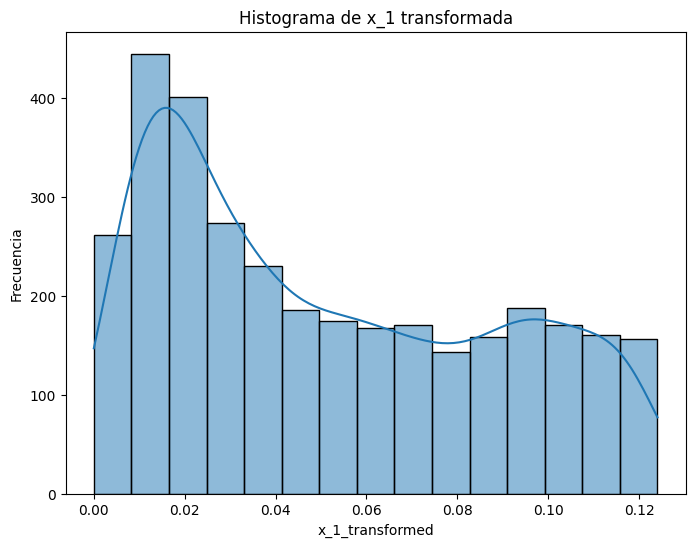

In [58]:
# Histograma de la variable x_1 transformada
plt.figure(figsize=(8,6))
sns.histplot(x_1_transformed, kde=True)
plt.xlabel('x_1_transformed')
plt.ylabel('Frecuencia')
plt.title('Histograma de x_1 transformada')

Text(0.5, 1.0, 'Diagrama de caja de x_1')

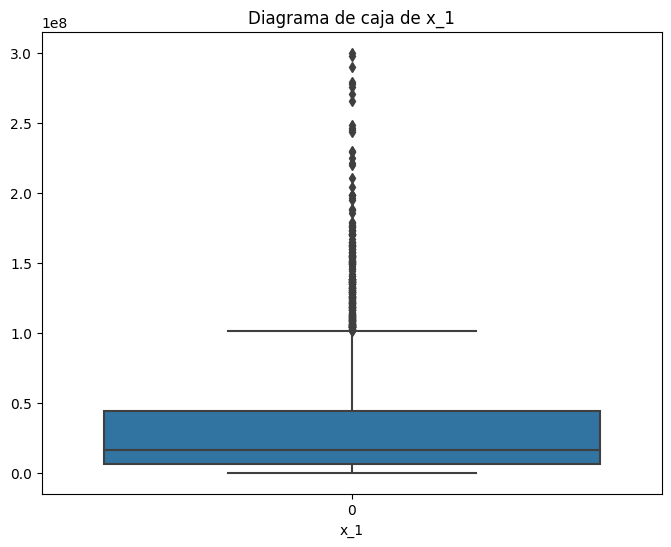

In [45]:
# Diagrama de caja de la variable x_1
plt.figure(figsize=(8,6))
sns.boxplot(x_1)
plt.xlabel('x_1')
plt.title('Diagrama de caja de x_1')

Text(0.5, 1.0, 'Diagrama de caja de x_1 transformed')

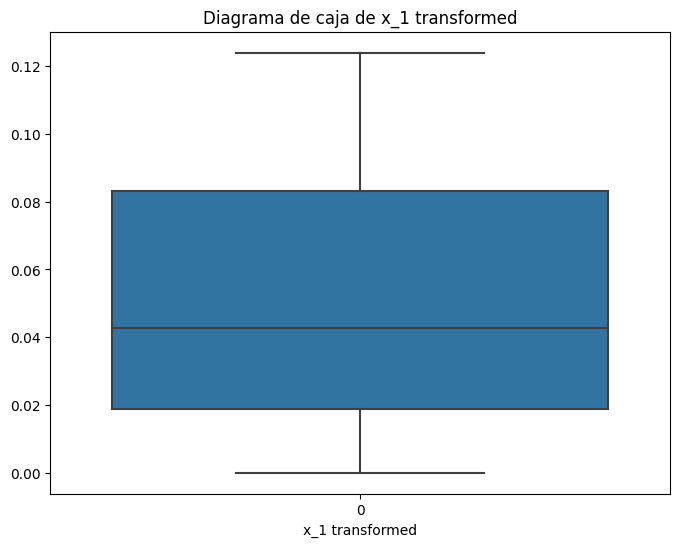

In [59]:
# Diagrama de caja de la variable x_1 transformada
plt.figure(figsize=(8,6))
sns.boxplot(x_1_transformed)
plt.xlabel('x_1 transformed')
plt.title('Diagrama de caja de x_1 transformed')

Text(0.5, 1.0, 'Histograma de x_2')

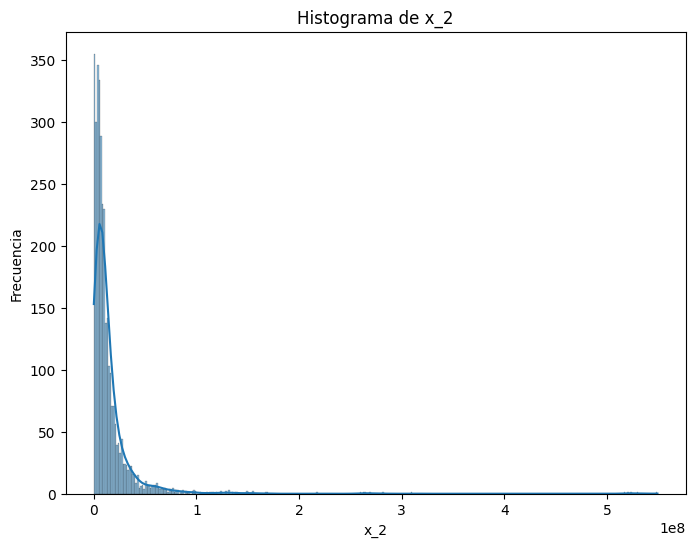

In [46]:
# Histograma de la variable x_2
plt.figure(figsize=(8,6))
sns.histplot(x_2, kde=True)
plt.xlabel('x_2')
plt.ylabel('Frecuencia')
plt.title('Histograma de x_2')

Text(0.5, 1.0, 'Histograma de x_2 transformada')

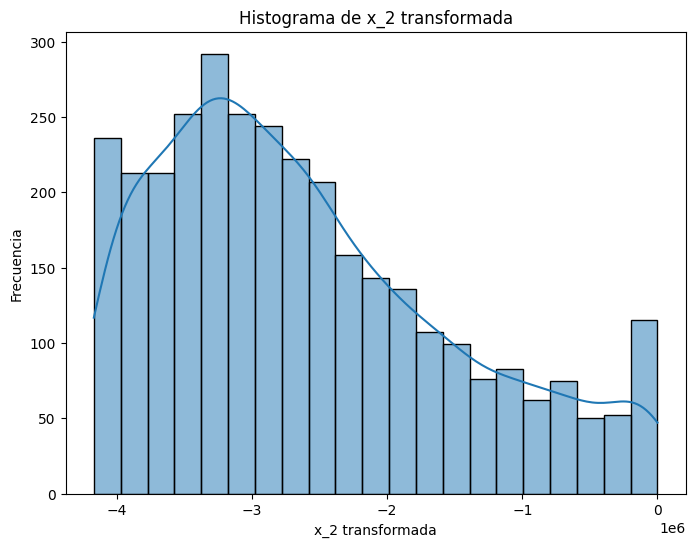

In [60]:
# Histograma de la variable x_2 transformada
plt.figure(figsize=(8,6))
sns.histplot(x_2_transformed, kde=True)
plt.xlabel('x_2 transformada')
plt.ylabel('Frecuencia')
plt.title('Histograma de x_2 transformada')

Text(0.5, 1.0, 'Diagrama de caja de x_2')

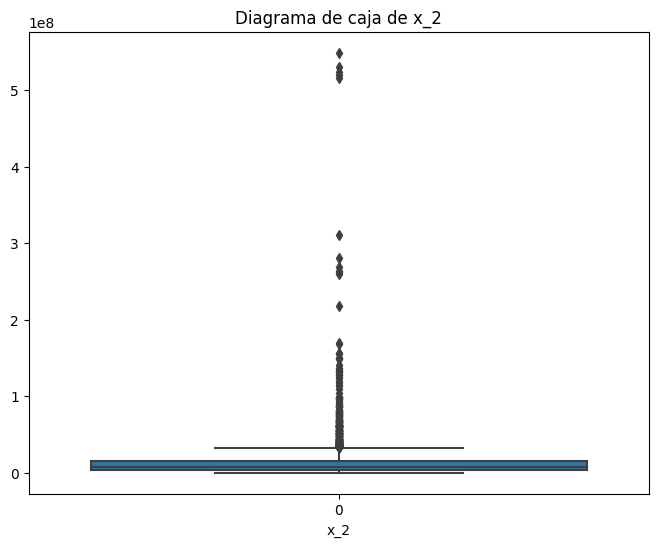

In [47]:
# Diagrama de caja de la variable x_2
plt.figure(figsize=(8,6))
sns.boxplot(x_2)
plt.xlabel('x_2')
plt.title('Diagrama de caja de x_2')

Text(0.5, 1.0, 'Diagrama de caja de x_2 transformada')

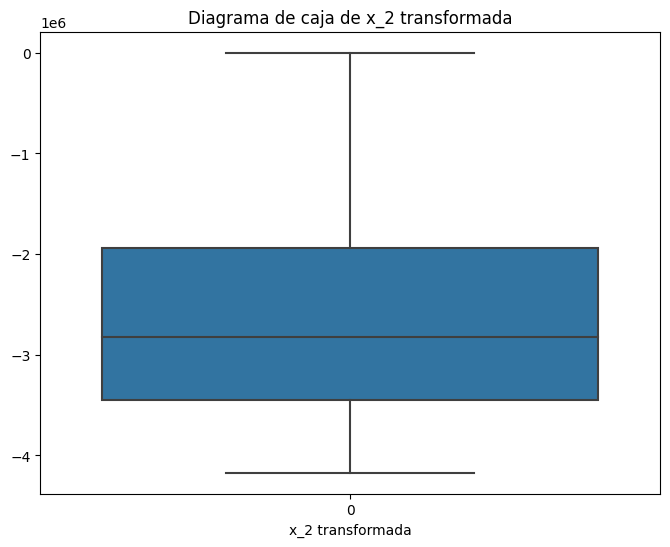

In [61]:
# Diagrama de caja de la variable x_2 transformada
plt.figure(figsize=(8,6))
sns.boxplot(x_2_transformed)
plt.xlabel('x_2 transformada')
plt.title('Diagrama de caja de x_2 transformada')